# 2. Stabilty Analysis of a Limmit Cycle

In [1]:
import numpy as np
from numpy import pi, exp, sqrt, power
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# Derived Pointcare function
def P(r,args):
    w, mu, eps, = arg;
    return sqrt(mu/(1-exp(-4*pi*mu*eps/w)*(1-mu/power(r,2))))

In [3]:
# Hopf Ocssilator 
def Hopf(t,x,arg):
    x1, x2 = x;
    w, mu, eps, = arg;
    return np.array([eps*(mu-(np.power(x1,2)+np.power(x2,2)))*x1+w*x2,
                     eps*(mu-(np.power(x1,2)+np.power(x2,2)))*x2-w*x1])

In [4]:
# Hopf Paramenters
w_val = 50;
mu_val = 1;
eps_val = 1
arg = [w_val,mu_val,eps_val]

In [5]:
# Event Function
def event(t, x, args):
    x1, x2 = x;
    w, mu, eps, = arg;
    return x2

event.direction = -1

In [6]:
# Simulating

n = 20
R = 2

tmax = 5
steps = 1000
t = np.linspace(0,tmax,steps)

sol = []
x = []

for i in range(20):
    r0 = R*(np.random.rand()*2-1)
    theta0 = 2*pi*np.random.rand()
    x0 = [r0*np.cos(theta0),r0*np.sin(theta0)]
    x.append(x0)
    sol.append(solve_ivp(Hopf, [0, tmax],x0, args=[arg], t_eval=t,events=event))


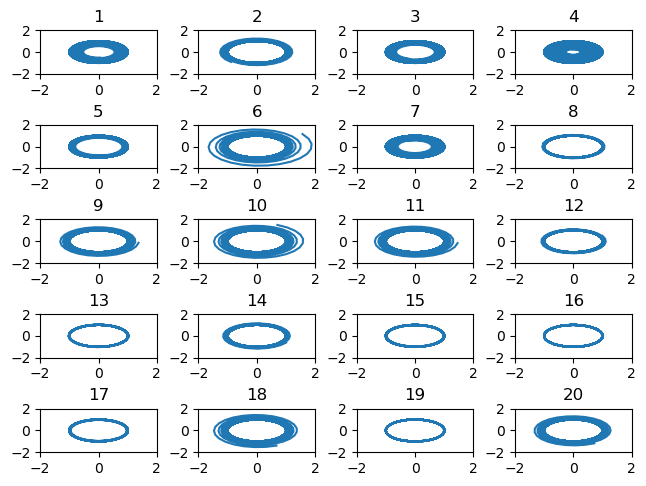

In [7]:
# Plotting Simulation 
fig, ax = plt.subplots(5,4)

xmin = -2
xmax = 2
ymin = -2
ymax = 2
j = 0;
for i in range(5):
    for k in range(4):
        ax[i][k].plot(sol[j].y[0,:],sol[j].y[1,:])
        ax[i][k].set_xlim([xmin,xmax])
        ax[i][k].set_ylim([ymin,ymax])
        ax[i][k].set_title(j+1)
        j = j+1;
        
fig.tight_layout(pad=0.5)


In [8]:
# Solving for the return map
return_map = []

for j in range(20):
    r = sol[j].y_events[0]
    return_map.append([[r[i] for i in range(len(r)-1)],[r[i+1] for i in range(len(r)-1)]])

Text(0.5, 1.0, 'Return Map')

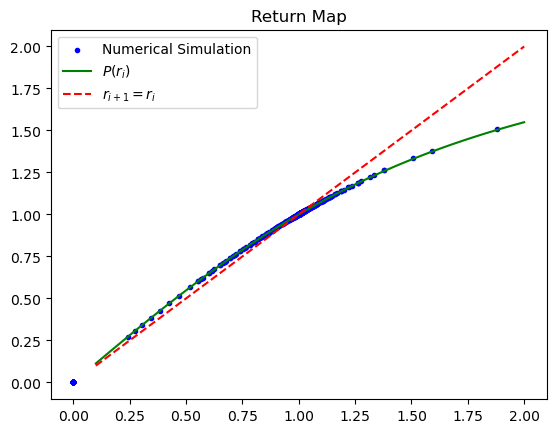

In [9]:
# Plotting 20 Simulations 
fig = plt.figure()
ax = fig.add_subplot()

X = np.linspace(0.1,R,100)
Y = P(X,arg)

data = ax.scatter(return_map[0][0],return_map[0][1],marker='.',color=['b'],label='Numerical Simulation')
srm = ax.plot(X,Y,'g'  ,label=r'$P(r_i)$')
xy  = ax.plot(X,X,'--r',label=r'$r_{i+1} = r_i$')

for j in range(20):
    ax.scatter(return_map[j][0],return_map[j][1],marker='.',color=['b'])

ax.legend()
ax.set_title("Return Map")